In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
#importar modelo lineal a usar
from sklearn import linear_model


In [ ]:
!wget -O consumoGasolina.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-03-12 04:50:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘consumoGasolina.csv’

consumoGasolina.csv 100%[===================>]  70.93K  --.-KB/s    in 0.007s  

2024-03-12 04:50:25 (9.72 MB/s) - ‘consumoGasolina.csv’ saved [72629/72629]



In [ ]:
datos = pd.read_csv("consumoGasolina.csv")
datos.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
#description estadistica de la data

datos.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
#Se filtran los datos necesarios

cdf = datos[['ENGINESIZE','CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


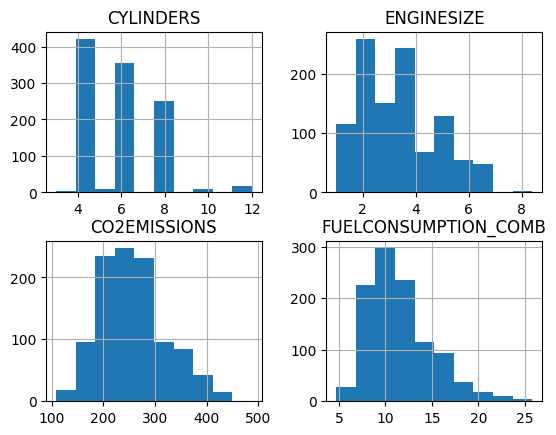

In [ ]:
#Exploracion de la data

viz = cdf[['CYLINDERS','ENGINESIZE', 'CO2EMISSIONS','FUELCONSUMPTION_COMB' ]]
viz.hist()
plt.show()

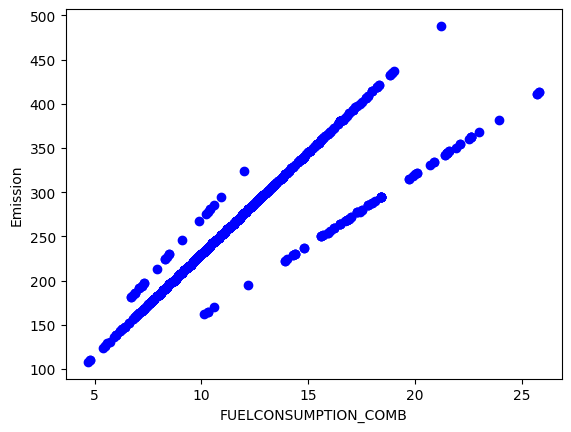

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

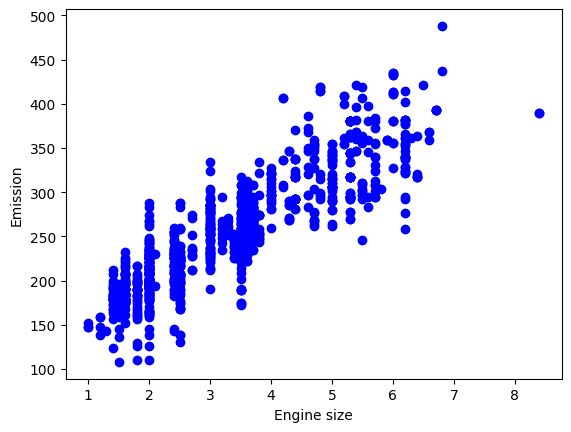

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

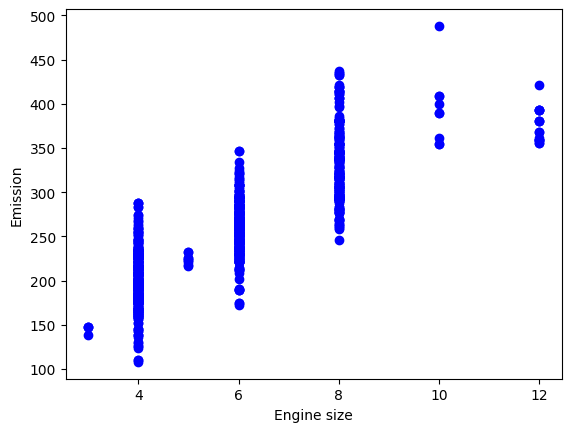

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

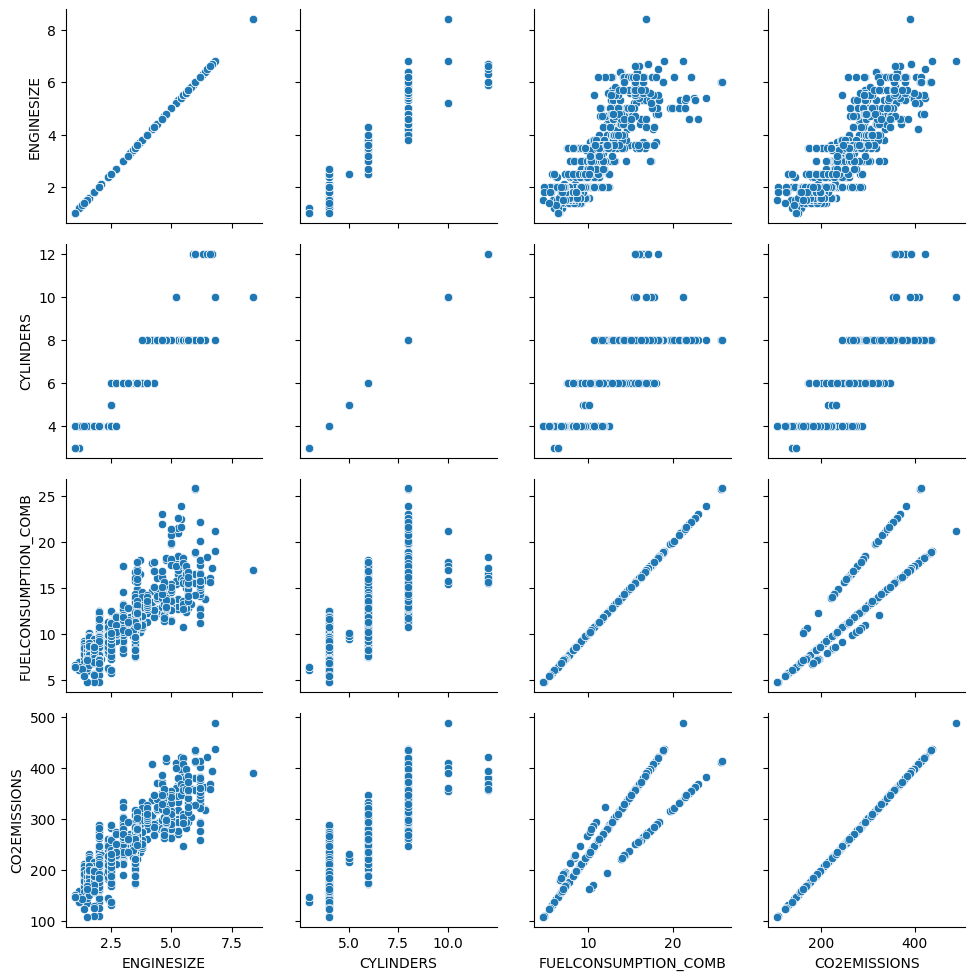

In [ ]:
#Exploracion para variables y correlaciones
g = sns.PairGrid(cdf)
g.map(sns.scatterplot)

In [ ]:
#se busca correlacon entre variables
corr = cdf.corr()
print(corr)


                      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  \
ENGINESIZE              1.000000   0.934011              0.819482   
CYLINDERS               0.934011   1.000000              0.776788   
FUELCONSUMPTION_COMB    0.819482   0.776788              1.000000   
CO2EMISSIONS            0.874154   0.849685              0.892129   

                      CO2EMISSIONS  
ENGINESIZE                0.874154  
CYLINDERS                 0.849685  
FUELCONSUMPTION_COMB      0.892129  
CO2EMISSIONS              1.000000  


In [ ]:
#Division de datos 80% entrenamiento, 20% prueba de modelo
entrenamiento = np.random.rand(len(cdf)) < 0.8
train = cdf[entrenamiento]
test = cdf[~entrenamiento]


In [ ]:
#se llama la regresion lineal desde sklearn

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Los coeficientes

print ('Coefficients:  ', regr.coef_)
print ('Intercept:  ', regr.intercept_)

Coefficients:   [[39.61356733]]
Intercept:   [123.5092719]


Text(0, 0.5, 'Emission')

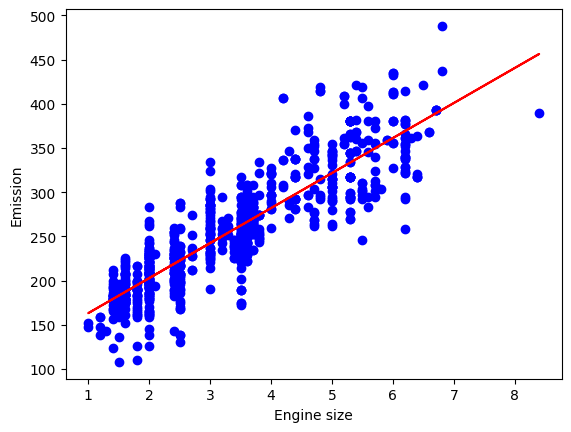

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [ ]:
#Se importa para poder realizar mediciones
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y = regr.predict(test_x)

print("Mean absolute error: %.2f"  %np.mean(np.absolute(test_y - test_y)))
print("Residual sum of squares (MSE): %.2f"  %np.mean((test_y - test_y)**2))
print("R2-score: : %.2f"  %r2_score(test_y, test_y))



Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: : 1.00


In [ ]:
#se llama la regresion lineal desde sklearn

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
regr.fit (train_x, train_y)

# Los coeficientes

print ('Coefficients:  ', regr.coef_)
print ('Intercept:  ', regr.intercept_)

Coefficients:   [[1.51186304]]
Intercept:   [2.76823326]


Text(0, 0.5, 'Emission')

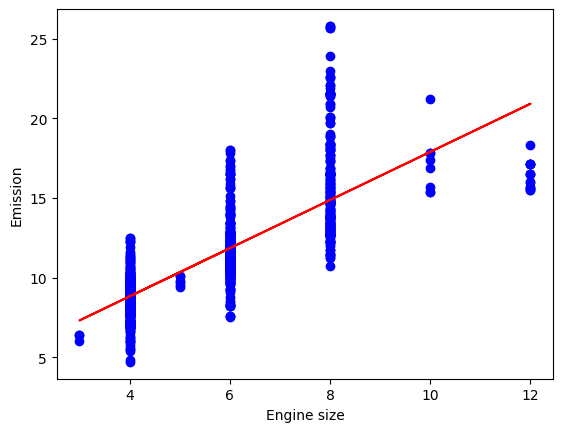

In [ ]:
plt.scatter(train.CYLINDERS, train.FUELCONSUMPTION_COMB, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#Se importa para poder realizar mediciones
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = regr.predict(test_x)

print("Mean absolute error: %.2f"  %np.mean(np.absolute(test_y - test_y)))
print("Residual sum of squares (MSE): %.2f"  %np.mean((test_y - test_y)**2))
print("R2-score: : %.2f"  %r2_score(test_y, test_y))


Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: : 1.00


In [ ]:
#se llama la regresion lineal desde sklearn

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['ENGINESIZE']])
regr.fit (train_x, train_y)

# Los coeficientes

print ('Coefficients:  ', regr.coef_)
print ('Intercept:  ', regr.intercept_)

Coefficients:   [[0.73047855]]
Intercept:   [-0.90191186]


Text(0, 0.5, 'Emission')

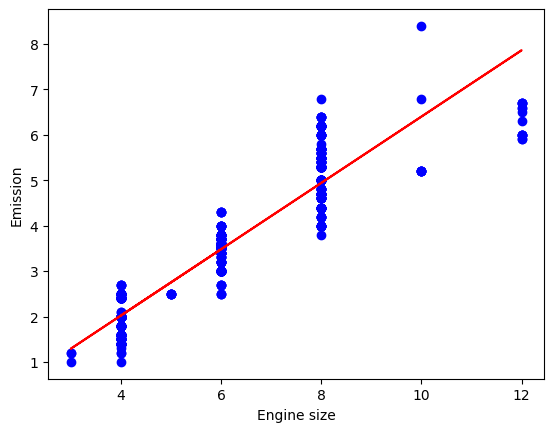

In [ ]:
plt.scatter(train.CYLINDERS, train.ENGINESIZE, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#Se importa para poder realizar mediciones
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['ENGINESIZE']])
test_y = regr.predict(test_x)

print("Mean absolute error: %.2f"  %np.mean(np.absolute(test_y - test_y)))
print("Residual sum of squares (MSE): %.2f"  %np.mean((test_y - test_y)**2))
print("R2-score: : %.2f"  %r2_score(test_y, test_y))

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: : 1.00


In [ ]:
#se llama la regresion lineal desde sklearn

regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['ENGINESIZE']])
regr.fit (train_x, train_y)

# Los coeficientes

print ('Coefficients:  ', regr.coef_)
print ('Intercept:  ', regr.intercept_)

Coefficients:   [[0.33227787]]
Intercept:   [-0.49369373]


Text(0, 0.5, 'Emission')

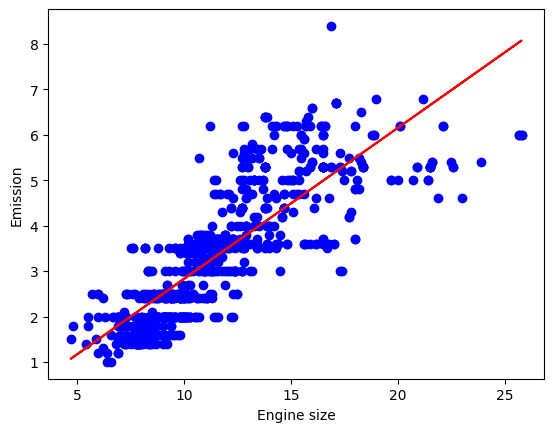

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.ENGINESIZE, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#Se importa para poder realizar mediciones
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['ENGINESIZE']])
test_y = regr.predict(test_x)

print("Mean absolute error: %.2f"  %np.mean(np.absolute(test_y - test_y)))
print("Residual sum of squares (MSE): %.2f"  %np.mean((test_y - test_y)**2))
print("R2-score: : %.2f"  %r2_score(test_y, test_y))

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: : 1.00
